# Numerical recipies
Tutorial 2 (16.02.23)

Tina Neumann

In [46]:
### Exercise 1
import numpy as np
import matplotlib.pyplot as plt

t = [0., 1.,4.3333,7.6667, 11.,14.333,17.667,21., 40.]
i = [0., 1.4925,15.323,3.2356,-29.472,-22.396,24.019,36.863, 40.]

In [47]:
def linspace(xmin,xmax,step):
    linarr = []
    dstep = (xmax-xmin)/step
    for s in range(step+1):
        linarr.append(xmin+s*dstep)
    return linarr

x_span = np.linspace(0,40,101)
xspan = linspace(0,40,100)
print(x_span,xspan)
print(len(x_span),len(xspan))

[ 0.   0.4  0.8  1.2  1.6  2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2
  5.6  6.   6.4  6.8  7.2  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8
 11.2 11.6 12.  12.4 12.8 13.2 13.6 14.  14.4 14.8 15.2 15.6 16.  16.4
 16.8 17.2 17.6 18.  18.4 18.8 19.2 19.6 20.  20.4 20.8 21.2 21.6 22.
 22.4 22.8 23.2 23.6 24.  24.4 24.8 25.2 25.6 26.  26.4 26.8 27.2 27.6
 28.  28.4 28.8 29.2 29.6 30.  30.4 30.8 31.2 31.6 32.  32.4 32.8 33.2
 33.6 34.  34.4 34.8 35.2 35.6 36.  36.4 36.8 37.2 37.6 38.  38.4 38.8
 39.2 39.6 40. ] [0.0, 0.4, 0.8, 1.2000000000000002, 1.6, 2.0, 2.4000000000000004, 2.8000000000000003, 3.2, 3.6, 4.0, 4.4, 4.800000000000001, 5.2, 5.6000000000000005, 6.0, 6.4, 6.800000000000001, 7.2, 7.6000000000000005, 8.0, 8.4, 8.8, 9.200000000000001, 9.600000000000001, 10.0, 10.4, 10.8, 11.200000000000001, 11.600000000000001, 12.0, 12.4, 12.8, 13.200000000000001, 13.600000000000001, 14.0, 14.4, 14.8, 15.200000000000001, 15.600000000000001, 16.0, 16.400000000000002, 16.8, 17.2, 17.6, 18.0, 18.400

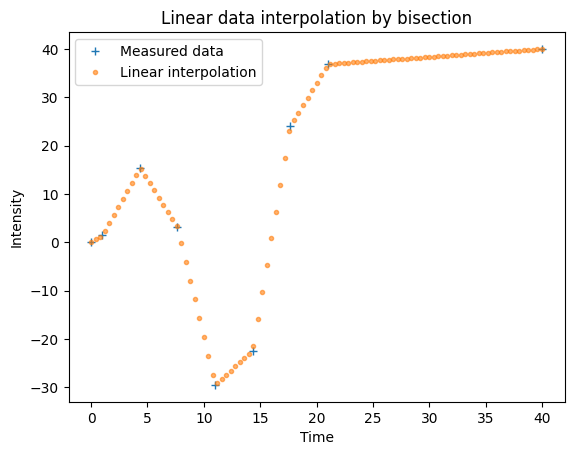

In [48]:
## 1.a) linear interpolation
def lin_interp(j_low,ind,x,y):
        try:
            dx = x[j_low+1]-x[j_low]
            dy = y[j_low+1]-y[j_low]
        except: #use slope of previous points
            dx = x[j_low]-x[j_low-1]
            dy = y[j_low]-y[j_low-1]
        m = dy/dx
        y_span = m*(ind-x[j_low]) + y[j_low] # equation of lecture II, slide 9 #n = -m*x[j_low]+y[j_low]   
        return y_span

    
def interp_algo(span,x,y):
    '''
    Linear interpolation via 
    bisection algorithm
    span: range within the algo should interpolate
    x: given x data (assuming that this is sorted)
    y: given y data
    ----------------
    return
    pos: x and y value of interpolated point
    '''
    ran = linspace(0,len(span),len(span))
    x_pos =  [] #save x and y position seperate
    y_pos = []
    v = 0
    while v != len(ran)-1: #iterate through all values of given interpolation x-range
        bi1 = 0
        bi2 = int(len(x)/2) #define index of bisection (!for even N +odd N (lower index via int()))
        bi3 = len(x)-1
        
        #bisection algorithm
        #find nearest lower index (jlow)
        while True:
            if x[bi1] <= span[v] < x[bi2]: #first half (bi1 stays)
                #print('if part I:', v, x[bi1],x[bi3])
                bi3 = bi2
                bi2 = int(bi1+(bi2-bi1)/2) #int(bi2*3/4)
            elif x[bi2]<= span[v] <= x[bi3]: #second half (bi3 stays)
                #print('if part II:', v, x[bi1],x[bi3])
                bi1 = bi2
                bi2 = int(bi2+(bi3-bi2)/2) #bi3*3/4) #bi2+bi3*1/4) ##unsure
            if bi1 == bi2 or bi3 == bi2:
                break

        j_low = bi1
        #print('1 while II',j_low)
        # j_low == index left of x value in span
        
        #call function for interpolation seperatelye
        y_span = lin_interp(j_low,span[v],x,y) 
        x_pos.append(span[v])
        y_pos.append(y_span)
        v += 1
        
    return x_pos, y_pos
    
    
plt.plot(t,i, '+', label = 'Measured data')

x_lin,y_lin = interp_algo(xspan,t,i)
plt.plot(x_lin,y_lin, '.', alpha = 0.6, label = 'Linear interpolation')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Linear data interpolation by bisection')
plt.legend()

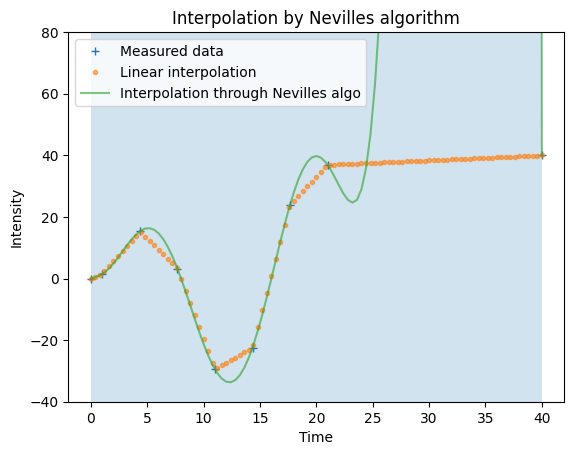

In [61]:
## 1.b) interpolation with nevilles algorithm 
### lecture 2, slide 10
#t = [1.,4.3333,7.6667, 11.,14.333,17.667,21.]
#i = [1.4925,15.323,3.2356,-29.472,-22.396,24.019,36.863]
def nevilles_algo(span,x,y):
    '''
    polynomial interpolation via 
    Neville's algorithm 
    span: points where to evaluate
    x: in bisection pre-determined x-values
    y: in bisection pre-determined y-values
    ----------------
    return
    pos: x and y value of interpolated point
    '''
    yPi = []
    derr = []
    # use recipe on slide 11
    # 1.) use bisection of 1.a) / 2.) set initial Pi as their y-values

    m = len(x) #len(given x-values) number of points (Pi)
    Pi = y.copy() #to avoid overwriting
    #from Tut2, 1.a)
    #for xx in span:
    for k in range(1,m+1):     #step 4
        #Pi[0:m-k] = ((span - np.array(x[k:m]))*Pi[0:m-k] + (np.array(x[0:m-k]) - span)*Pi[1:m-k+1])/(np.array(x[0:m-k]) - np.array(x[k:m]))
        #print(np.subtract(x[k:m],span)*Pi[0:m-k])
        #Pi[0:m-k]=(np.subtract(x[k:m],xx)*Pi[0:m-k]+np.subtract(xx,x[0:m-k])*Pi[1:m-k+1])/(np.subtract(x[k:m],x[0:m-k]))
        for i in range(0,m-k): #step 5, current interval [xi,x(i+k)]
            j =  i + k #define j index
            # H(x)
            h = ((x[j]-xx)*Pi[i] + (xx-x[i])*Pi[i+1])/(x[j]-x[i])
            Pi[i] = h #step 6 (update / overwrite the p-value)#h = ((x[j]-xx)*Pi[i] + (xx-x[i])*Pi[i+1])/(x[j]-x[i])#Pi[k-1] = h #step 6 (update / overwrite the p-value)

    yPi.append(Pi[0]) #append last remaining P-value
    derr.append(abs(Pi[2]-Pi[1])) # step 7: save error as difference of last values

    return yPi, derr # return y-value and its error

# plotting referring to 1.a)
plt.plot(t,i, '+', label = 'Measured data')
plt.plot(x_lin,y_lin, '.', alpha = 0.6, label = 'Linear interpolation')

y_nev = []
err_nev = []
for xx in xspan:
    y2, derr = nevilles_algo(xx,t,i)
    y_nev.append(y2)
    err_nev.append(derr)
    

plt.plot(xspan,y_nev, '-', alpha = 0.6, label = 'Interpolation through Nevilles algo')
# error seems to high :( #print(err_nev)
plt.fill_between(xspan,np.subtract(y_nev,err_nev)[0], np.add(y_nev,err_nev)[0], alpha=0.2)
plt.ylim(-40,80)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Interpolation by Nevilles algorithm')
plt.legend()

In [50]:
## 1. c) interpolation with nytural spline interpolator
### lecture 2, slide 18
def cub_spline(span,x,y):
    '''
    piece-wise polynomial interpolation via 
    (natural) cubic splines 
    span: range within the algo should interpolate
    x: given x data (assuming that this is sorted)
    y: given y data
    ----------------
    return
    pos: x and y value of interpolated point
    '''
    yPi = []
    derr = []
    
# define splines
def y0(x,x0,a,b,c,d):
    y = a + b*(x-x0) + c*(x-x0) + d*(x-x0)

In [51]:
#backup
def qua_interp(j_low,ind,x,y):
    #y = a*x**2 + b*x + c
    return y_span

def qua_interp(j_low,ind,x,y):
    #y = a*x**3 + b*x**3 + c*x + d
    return y_span